In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 50 #How many text files do we have?

"Part I) Calculations and extraction of data"
"Function to extract data and calculate velocities from experimental values"

def extract_values(file):
    with open(file, 'r') as data: # Extract data from arbitrary .txt file
        t=[]; x=[]; y=[] #time, x-position and y position
        
        for _ in range(2): # Skip the two first lines of text (contains no data)
            next(data)
        for line in data: # Append data to empty lists
            p=line.split()
            c=0.22 #Multiplying factor 0.22 to convert to cm
            t.append(float(p[0])); x.append(float(p[1])*c); y.append(float(p[2])*c) #Scaled values
    
    #Numerical calculation of velocity from two following frames 
    v_x=[]; v_y=[]; v=[];
    for i in range(len(t)):
        v_x.append( (x[i-1]-x[i]) / (t[i-1]-t[i])) #Velocity x-direction
        v_y.append( (y[i-1]-y[i]) / (t[i-1]-t[i])) #Velocity y-direction
        v.append( np.sqrt(v_x[i]**2 + v_y[i]**2) ) #Velocity   
    
    return t, x, y, v_x, v_y, v


def values(): #Initialize lists for extracted and calculated data for each .txt file
    t=[]; x=[]; y=[]
    v_x=[]; v_y=[]; v=[]
    for i in range(1,N): #Iterate over each .txt file
        t1,x1,y1,v_x1,v_y1,v1 = extract_values(f'mass8_{i}.txt') #The names of the txt files are mass8_(insert number here)
        t.append(t1); x.append(x1); y.append(y1)
        v_x.append(v_x1); v_y.append(v_y1); v.append(v1)
        
    #Turn nested list into one flat list
    t = sum(t, []); x = sum(x, []); y = sum(y, []); 
    v_x = sum(v_x, []); v_y = sum(v_y, []); v = sum(v, [])
    
    return t, x, y, v_x, v_y, v 


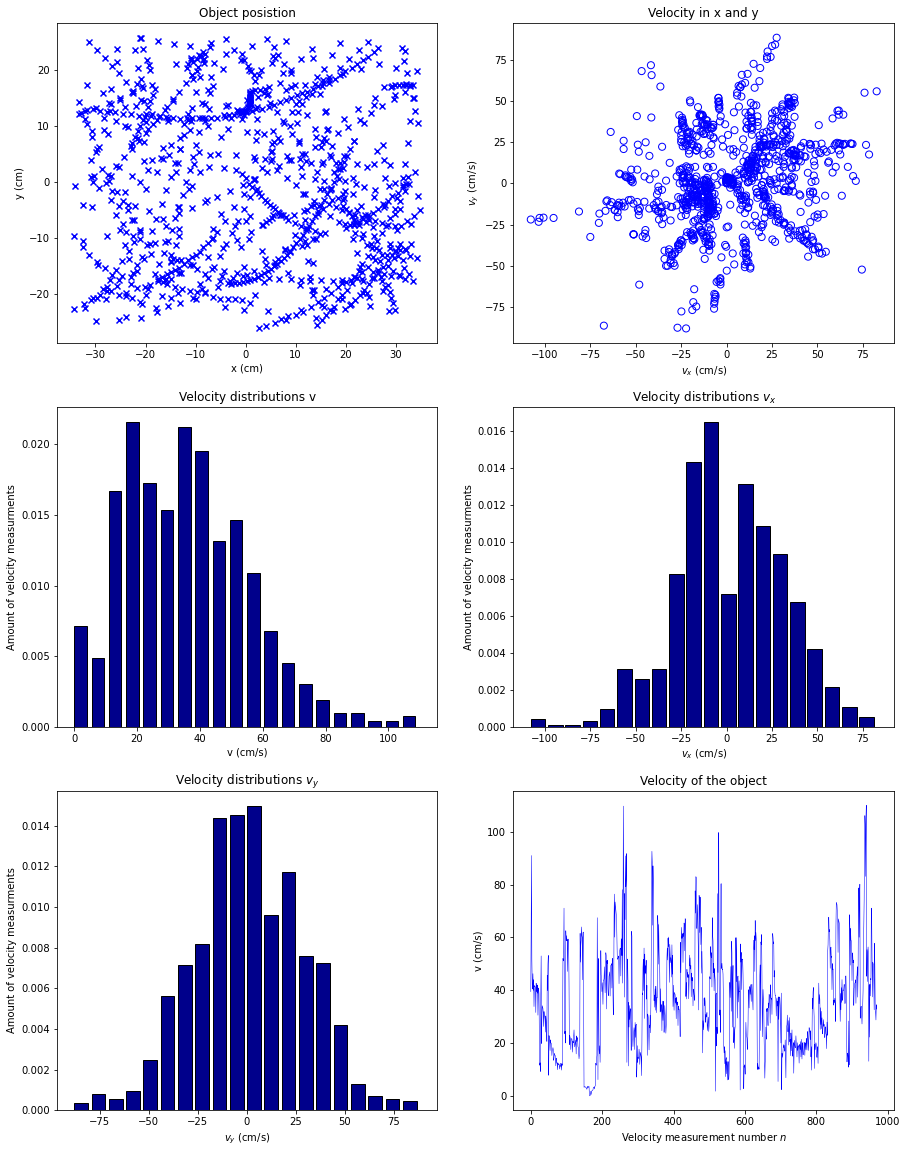

In [4]:
"Part II) Plotting of calculated and extracted data"
t,x,y,v_x,v_y,v=values() #Defining lists with all values
N = 920 #Amount of datapoints 
v2_avg = (1/N) * sum([velocity**2 for velocity in v]) #Arithmetic mean of squared velocity
B = 1/v2_avg 

#Distributions
fv=[]; fv_x=[]; fv_y=[]
for i, j, k in zip(v, v_x, v_y):
    fv.append(2*B*i*np.exp(-B*i**2))
    fv_x.append(np.sqrt(B/np.pi)*np.exp(-B*j**2)) 
    fv_y.append(np.sqrt(B/np.pi)*np.exp(-B*k**2)) 

figure, axis = plt.subplots(3, 2, figsize=(15, 20))
  
#Scatterplot of position
axis[0, 0].scatter(x, y,marker='x',color='b'); axis[0, 0].set_title("Object posistion")
axis[0, 0].set(xlabel='x (cm)', ylabel='y (cm)')
  
#Scatter plot av farten
axis[0, 1].scatter(v_x, v_y, facecolors='none', edgecolors='b',s=50); axis[0, 1].set_title("Velocity in x and y")
axis[0, 1].set(xlabel=r'$v_x$ (cm/s)', ylabel='$v_y$ (cm/s)')
  
#Histogram for the distributions of the speed/velocity
axis[1, 0].hist(np.abs(v), bins=20,color='darkblue',edgecolor='black',density=True, width=4); 
axis[1, 0].set_title("Velocity distributions v");axis[1, 0].set(xlabel='v (cm/s)', ylabel='Amount of velocity measurments')

axis[1, 1].hist(v_x, bins=20,color='darkblue',edgecolor='black',density=True, width=8);
axis[1, 1].set_title(r"Velocity distributions $v_x$"); axis[1, 1].set(xlabel=r'$v_x$ (cm/s)', ylabel='Amount of velocity measurments')

axis[2, 0].hist(v_y, bins=20,color='darkblue',edgecolor='black',density=True, width=7); 
axis[2, 0].set_title(r"Velocity distributions $v_y$"); axis[2, 0].set(xlabel=r'$v_y$ (cm/s)', ylabel='Amount of velocity measurments')

#Plotting the velocity itself
axis[2, 1].plot(np.linspace(0,len(v),len(v)),v, color = 'b', linewidth=0.5)
axis[2, 1].set(xlabel=r'Velocity measurement number $n$', ylabel='v (cm/s)');axis[2, 1].set_title("Velocity of the object")
plt.show()

**Finding Boltzmanns constant with the equipartition principle**

In [6]:
m = 32 * 10**-4 #Plastikk diskenes vekt i kg
T = 300 #Temp i kelvin

equipartition = 1/2 * m * v2_avg * 1/T

print('Boltzmanns constant for this object k_p with equipartition was found to be', equipartition, 'm^2 kg s-2 K^-1')

Boltzmanns constant for this object k_p with equipartition was found to be 0.009562138430160912 m^2 kg s-2 K^-1


**Is the found average velocity have the correct ratio?**

In [7]:
#First the arithmetic mean from the velocity and the root mean square below
v_avg = sum(v)/N 
v_rms = np.sqrt(v2_avg)

print('The ratio between average and root mean square velocity is', v_avg/v_rms, 'This is a deviance of', np.sqrt(np.pi)/2 - v_avg/v_rms, 'from pi/2')

The ratio between average and root mean square velocity is 0.9041371095396115 This is a deviance of -0.01791018408685352 from pi/2


In [8]:
#Checking the arithmetic mean to compare in each respective direction
vx_avg = sum(v_x)/N
vy_avg = sum(v_y)/N
x_avg = sum(x)/N
y_avg = sum(y)/N

print('Comparing mean velocity in each respective direction: <v_x> =', vx_avg, ',<v_y> =', vy_avg,)
print('Comparing mean velocity in each respective direction: <x> =', x_avg, ',<y> =', y_avg)


Comparing mean velocity in each respective direction: <v_x> = 2.146596730398277 ,<v_y> = 1.8049009700201166
Comparing mean velocity in each respective direction: <x> = 2.287715913043477 ,<y> = -0.5187865434782613


Uses arithmetic mean, N is the number of data points. Sums over all values ​​with the sum function. ($\frac 1N\sum x_i$). We see that the differences between mean speeds $\langle v_x \rangle = 2.13 cm/s (\hat x), \langle v_y \rangle = 1.77 cm/s (\hat y)$. There is a drift around that stationary state. In the x and y direction, it wants to stand still, that is where the speed has the highest probability of being found, especially on $v_y$. The histograms tell something different than the average.